## Импортируем библиотеки

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

## Считаем результаты из файла

In [93]:
def ReadFile(path):
    res = []
    with open(path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
            line = [float(x) for x in line.split()]
            res.append(line)
    return np.array(res)

# Графики для OpenMP

## Отрисуем 3D-График

In [149]:
def Plot3D(path, type_):
    result = ReadFile(path)
    shape = result.shape
    X = np.zeros((shape[0] // 5, 5))
    Y = np.zeros_like(X)
    Z = np.zeros_like(X)
    for num_size in range(X.shape[0]):
        for i in range(5):
            X[num_size, i] = result[num_size * 5 + i, 0]
            Y[num_size, i] = result[num_size * 5 + i, 1]
            Z[num_size, i] = result[num_size * 5 + i, 2]
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=1, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_title(f'{type_} Algorythm results on Polus', fontsize=20)
    ax.set_xlabel('Number of threads', fontsize=20, labelpad=20)
    ax.set_ylabel('Size', fontsize=20, labelpad=20)
    ax.set_zlabel('Time, s', fontsize=20, labelpad=20)
    plt.show()      
    

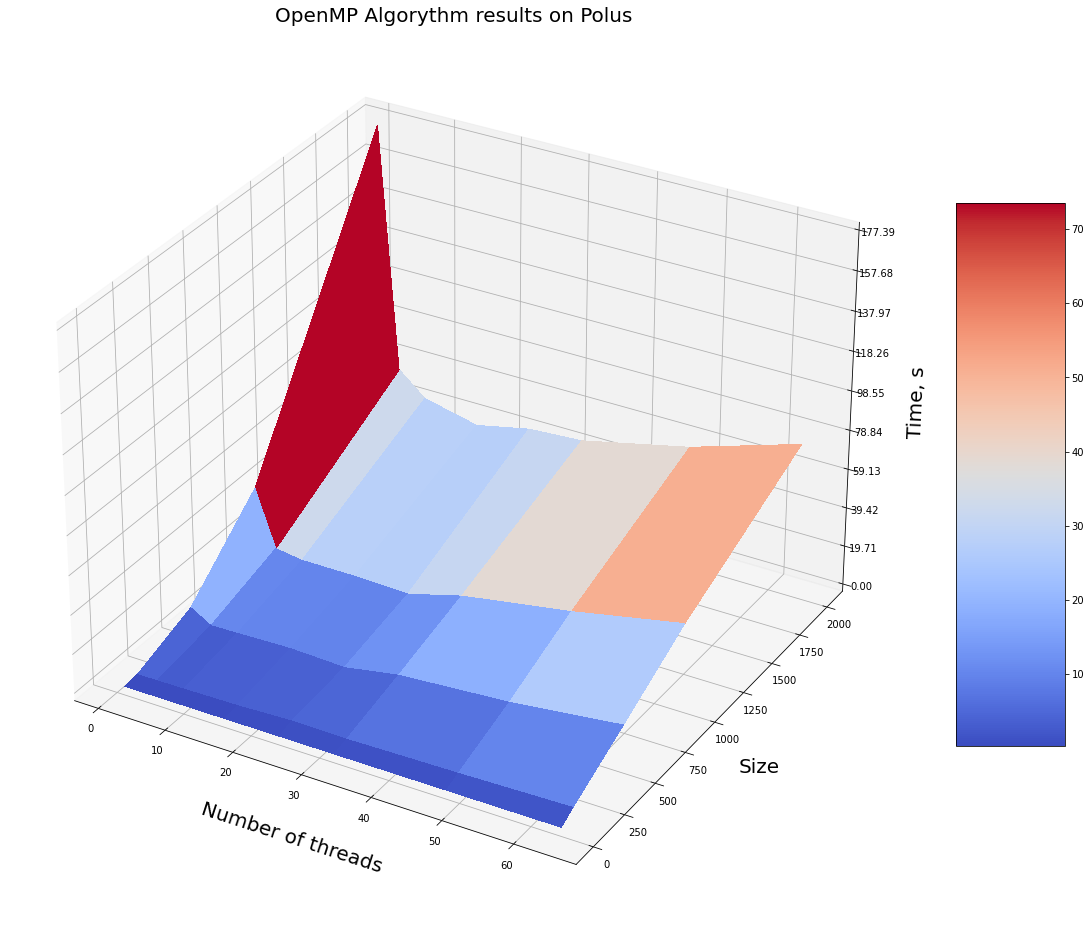

In [150]:
Plot3D('Results/openmp.txt', 'OpenMP')

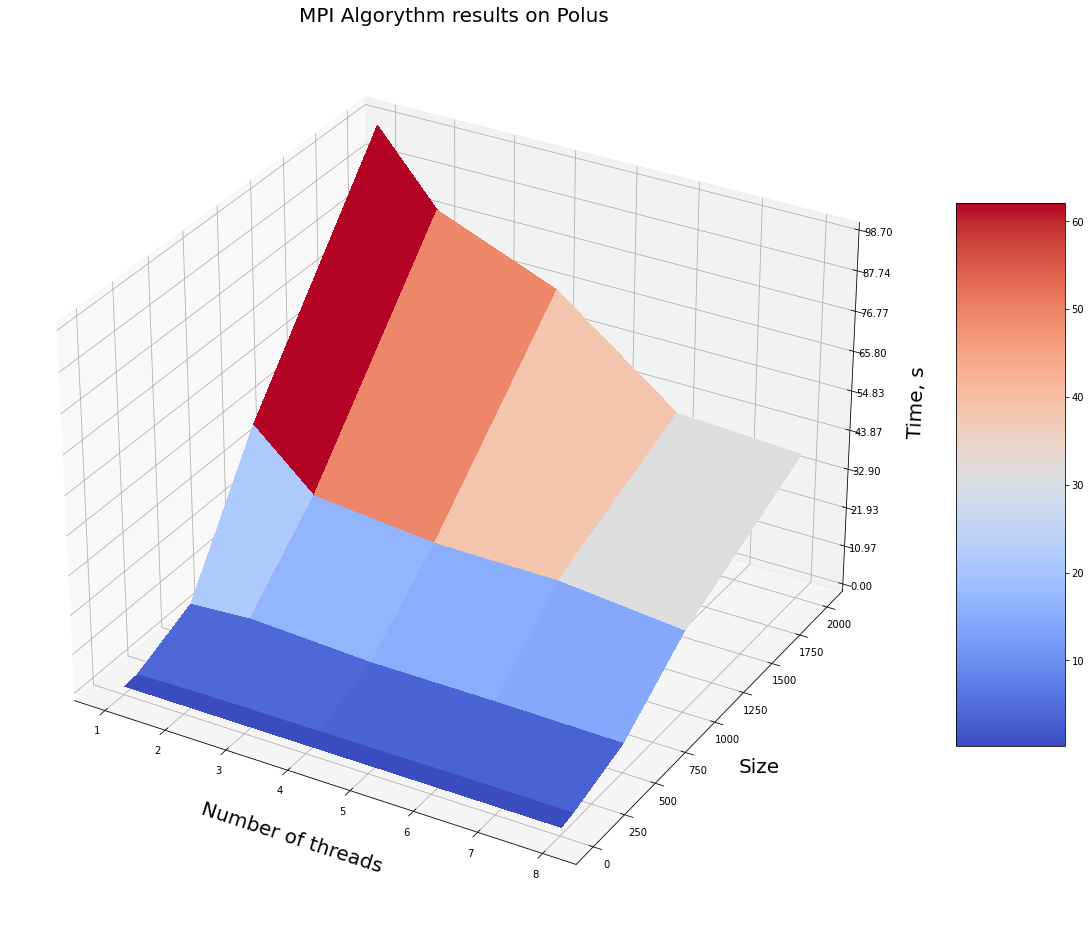

In [152]:
Plot3D('Results/openmpi.txt', 'MPI')

## Отрисуем 2D-График для оценки времени работы алгоритма в зависимости от числа потоков

In [153]:
def Plot2D(path, type_):
    result = ReadFile(path)
    res1 = dict()
    n_sizes = 5
    for i in range(0, result.shape[0], n_sizes):
        res1[result[i, 0]] = result[i:i+n_sizes, 2]
        
    fig = plt.figure(figsize=(20, 20))
    ax = fig.gca()
    sizes = np.array([10, 100, 500, 1000, 2000])
    for thrd, time in res1.items():
        ax.plot(sizes, time, label=str(thrd), linewidth=2)
    ax.legend(fontsize=20)
    ax.set_title(f'Running time of {type_} Algorythm depending on the size for different number of threads', fontsize=20)
    ax.set_xlabel('Time, s', fontsize=20)
    ax.set_ylabel('Size', fontsize=20)
    plt.show()

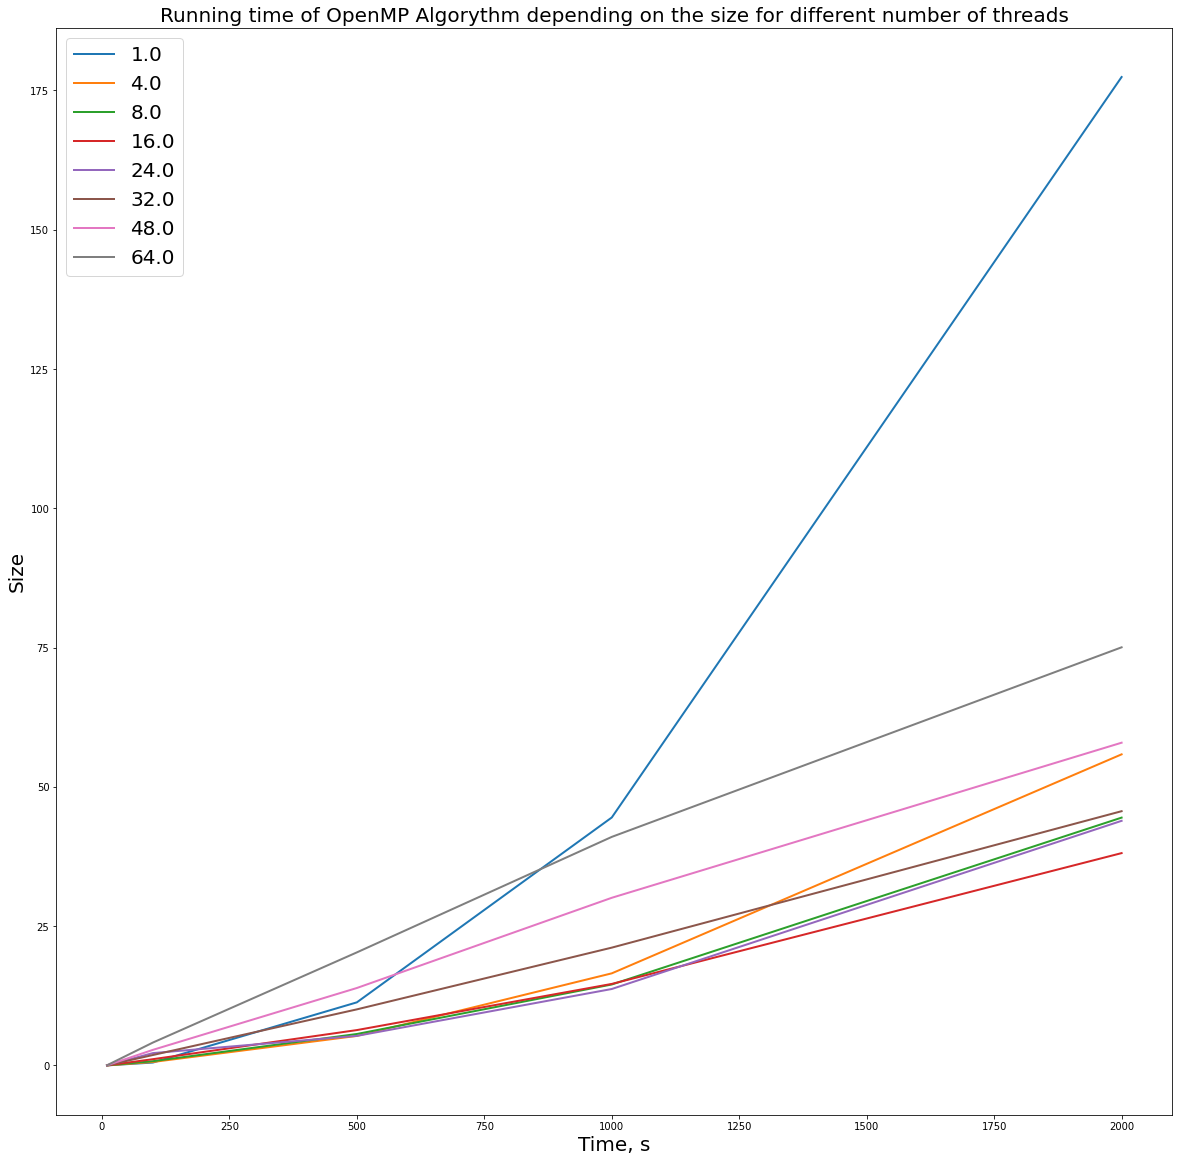

In [154]:
Plot2D('Results/openmp.txt', 'OpenMP')

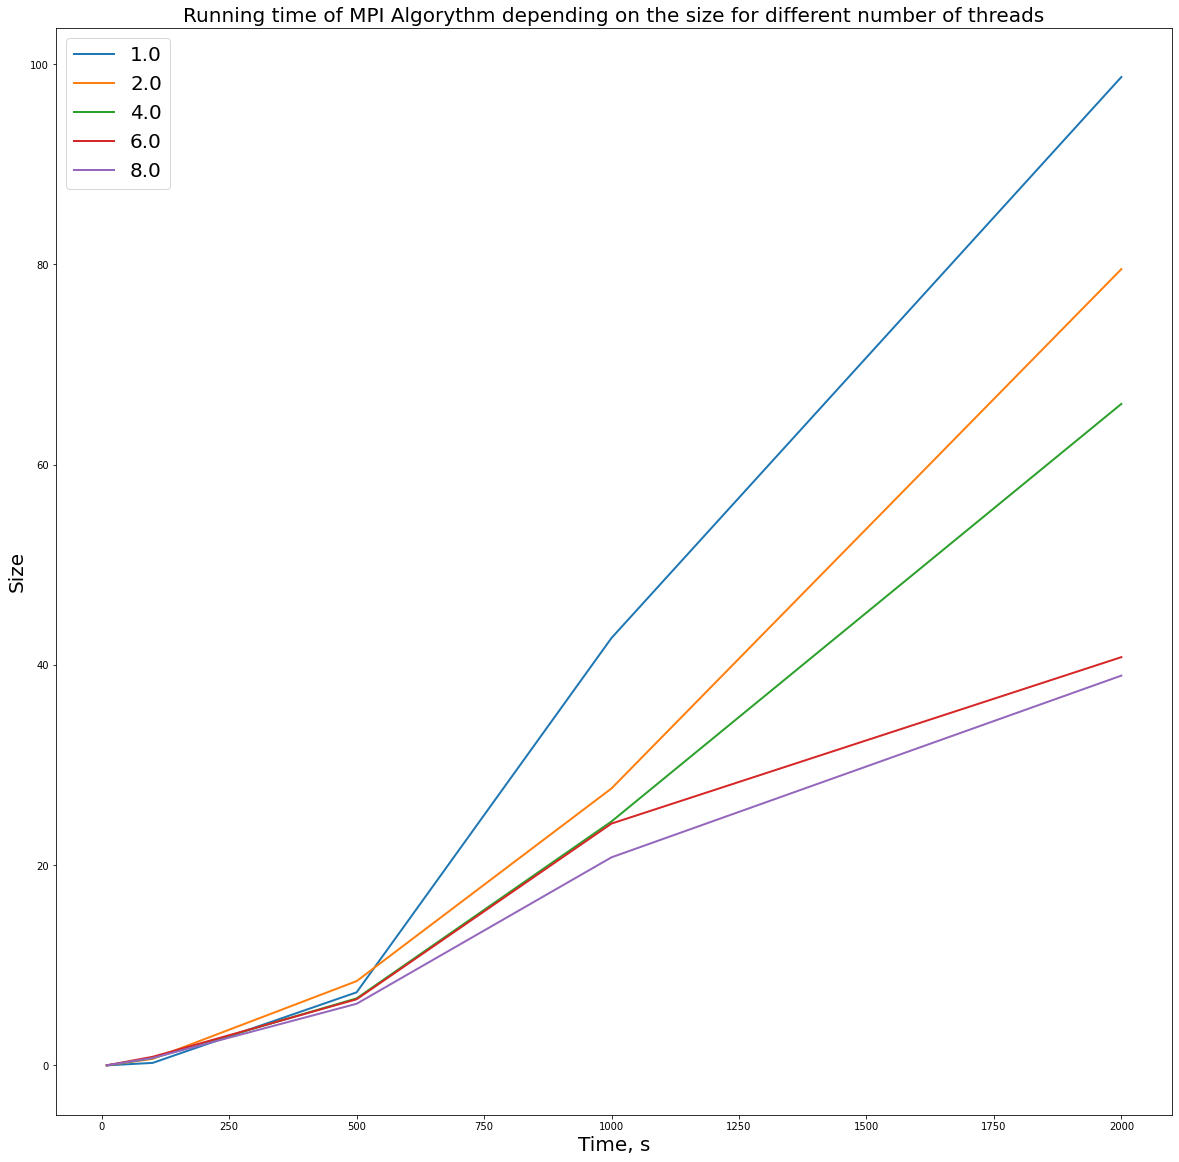

In [155]:
Plot2D('Results/openmpi.txt', 'MPI')